In [1]:
import eikon as ek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dateutil.relativedelta

ek.set_app_key('89915a3b58874e1599870c6ecc45d6edd6344f8c')

In [2]:
start_date = dt.date(2000,1,1)
end_date = dt.date(2023,1,1)
dates = [start_date]
i = 0
while (dates[0] + dateutil.relativedelta.relativedelta(months=i+1)) <= end_date:
    dates.append(dates[0] + dateutil.relativedelta.relativedelta(months=i+1))
    i += 1
str_dates = list(map(str,dates))

In [3]:
complete_df = pd.DataFrame(columns=['Instrument','Date','CallDate'])

In [4]:
failed_dates = []

In [5]:
errors_dict = {}

In [6]:
##### HAY QUE AUTOMATIZAR LOS ERRORES DE DESCARGA (guardar ultima fecha completada con exito y guardar automaticamente a csv de backup) ######

#complete_df = pd.DataFrame(columns=['Instrument', 'Price Close', 'Date','CallDate'])
for date in str_dates:
    try:
        returned_df,err = ek.get_data(f'0#.STOXX({date})',fields=['TR.EVToSales','TR.EVToSales.date'],parameters={'SDate':date})
    except Exception as x:
        print('failed for '+date)
        errors_dict[date] = x
        failed_dates.append(date)
    else:
        returned_df['CallDate'] = date
        complete_df = pd.concat([complete_df,returned_df],axis=0)
        print(f'completed loop for {date}')

completed loop for 2000-01-01
completed loop for 2000-02-01
completed loop for 2000-03-01
completed loop for 2000-04-01
completed loop for 2000-05-01
completed loop for 2000-06-01
completed loop for 2000-07-01
completed loop for 2000-08-01
completed loop for 2000-09-01
completed loop for 2000-10-01
completed loop for 2000-11-01
completed loop for 2000-12-01
completed loop for 2001-01-01
completed loop for 2001-02-01
completed loop for 2001-03-01
completed loop for 2001-04-01
completed loop for 2001-05-01
completed loop for 2001-06-01
completed loop for 2001-07-01
completed loop for 2001-08-01
completed loop for 2001-09-01
completed loop for 2001-10-01
completed loop for 2001-11-01
completed loop for 2001-12-01
completed loop for 2002-01-01
completed loop for 2002-02-01
completed loop for 2002-03-01
completed loop for 2002-04-01
completed loop for 2002-05-01
completed loop for 2002-06-01
completed loop for 2002-07-01
completed loop for 2002-08-01
completed loop for 2002-09-01
completed 

In [7]:
complete_df.rename(columns={'Enterprise Value To Sales (Daily Time Series Ratio)':'EVToSales'},inplace = True)

In [44]:
complete_df

,Instrument,Date,CallDate,EVToSales
0,III.L,<NA>,2000-01-01,<NA>
1,A2.MI,<NA>,2000-01-01,<NA>
2,ABBN.S,<NA>,2000-01-01,<NA>
3,ABE.MC^H18,<NA>,2000-01-01,<NA>
4,ABF.L,<NA>,2000-01-01,<NA>
...,...,...,...,...
595,WLN.PA,2022-12-30T00:00:00Z,2023-01-01,4.463208
596,WPP.L,2022-12-30T00:00:00Z,2023-01-01,1.082214
597,YAR.OL,2022-12-30T00:00:00Z,2023-01-01,0.62606
598,ZALG.DE,2022-12-30T00:00:00Z,2023-01-01,0.854686


<AxesSubplot: xlabel='CallDate'>

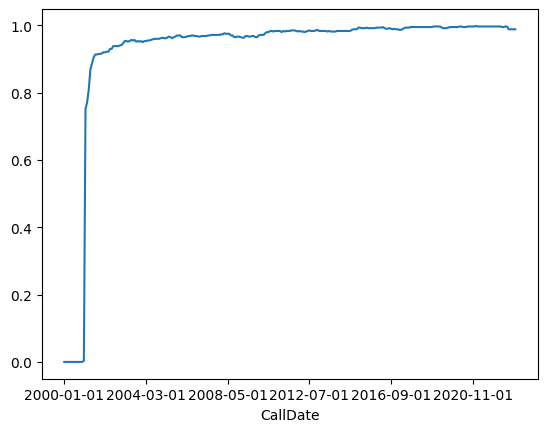

In [8]:
(complete_df.pivot(index='CallDate',columns='Instrument', values='EVToSales').notna().sum(axis=1)/600).plot()

In [9]:
pivoted_df = complete_df.pivot(index='CallDate',columns='Instrument', values='EVToSales')

In [10]:
pivoted_df = pivoted_df.dropna(axis=0,how='all').dropna(axis=1,how='all')

<AxesSubplot: xlabel='CallDate'>

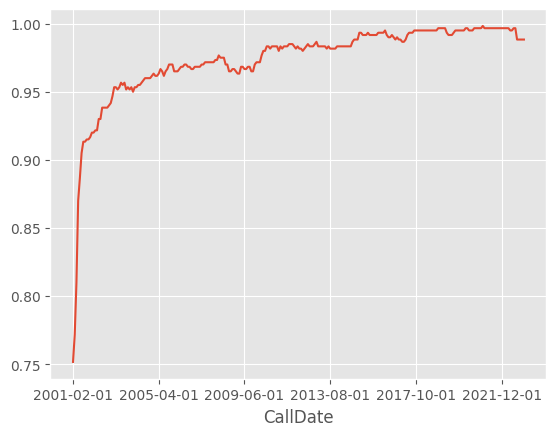

In [43]:
(pivoted_df.loc[pivoted_df.notna().sum(axis=1)>200].notna().sum(axis=1)/600).plot()

In [11]:
pivoted_df.to_csv('../data/EVToSales_w_dropna.csv')

In [12]:
ranked_df = pivoted_df.T
###### HAY QUE HACER DE FORMA VECTORIZADA #########
for date,prices in zip(pivoted_df.index,pivoted_df.astype(float).values):
    ranked_df[date] = pd.qcut(prices,10,duplicates='drop',labels=False)
ranked_df
#### decil 0 tiene los valores mas bajos y el 9 los mas altos ####
def deciles_lists(df):
    diccionario = {}
    for i in range(10):
        diccionario[f'decil_{i}'] = {}
        for date,ranks in df.items():
            diccionario[f'decil_{i}'][date] = ranks.loc[ranks == i].index.tolist()
    return diccionario

In [13]:
ranked_df

CallDate,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
Instrument,,,,,,,,,,,,,,,,,,,,,
1COV.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1U1.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2.MI,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0,8.0,8.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
A3M.MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAA.L^C21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIGGO.AS^L14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZO1G.DE^A22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZODC.PA^C18,NaN,NaN,NaN,4.0,5.0,5.0,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ranked_df.drop(columns=ranked_df.columns[0],inplace=True)

In [27]:
precios_df = pd.read_csv('../data/Final Data/PriceClose.csv',index_col='CallDate')

In [28]:
extra_columns = set(precios_df.columns)-set(ranked_df.index)

In [29]:
ranked_df = ranked_df.loc[list(set(precios_df.columns)-extra_columns)]

In [30]:
deciles_dict = deciles_lists(ranked_df)
rentabilidad_acciones_df = precios_df.pct_change()
rentabilidad_acciones_df

,1COV.DE,1U1.DE,A2.MI,A3M.MC,AAAA.L^C21,AAH.AS^D08,AAK.ST,AAL.L,AALB.AS,AB.L^G07,...,YAR.OL,YIT.HE,YSO.LS,ZALG.DE,ZEL.MC^K15,ZIGGO.AS^L14,ZO1G.DE^A22,ZODC.PA^C18,ZOT.MC^E22,ZURN.S
CallDate,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,0.105276,NaN,NaN,-0.143145,NaN,NaN,NaN,-0.124825,...,NaN,NaN,0.012214,NaN,NaN,NaN,NaN,NaN,NaN,-0.153537
2000-03-01,NaN,NaN,0.445866,NaN,NaN,0.020706,NaN,NaN,NaN,-0.039521,...,NaN,NaN,0.219457,NaN,NaN,NaN,NaN,NaN,NaN,-0.068273
2000-04-01,NaN,NaN,-0.138705,NaN,NaN,0.073767,NaN,NaN,NaN,0.103091,...,NaN,NaN,-0.195269,NaN,NaN,NaN,NaN,NaN,NaN,0.181457
2000-05-01,NaN,NaN,-0.129494,NaN,NaN,-0.036496,NaN,-0.052128,NaN,-0.054192,...,NaN,NaN,-0.150817,NaN,NaN,NaN,NaN,NaN,NaN,-0.111035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,-0.104992,0.0,-0.091285,0.0,0.0,0.000000,-0.127370,-0.080638,-0.134493,0.000000,...,0.009358,0.0,0.000000,-0.182728,0.0,0.0,0.0,0.0,0.0,0.014964
2022-10-01,-0.001352,0.0,-0.091091,0.0,0.0,0.000000,-0.083538,0.002274,-0.044155,0.000000,...,-0.136254,0.0,0.000000,-0.082540,0.0,0.0,0.0,0.0,0.0,-0.056986
2022-11-01,0.148612,0.0,0.123225,0.0,0.0,0.000000,0.077370,0.032707,0.059224,0.000000,...,0.257820,0.0,0.000000,0.201186,0.0,0.0,0.0,0.0,0.0,0.054390


In [31]:
rentabilidades_dict = {}
rentabilidades_dict['equiponderado'] = {}
for decil,fechas in deciles_dict.items():
    rentabilidades_dict[decil] = {}
    for fecha, stocks in fechas.items():
        rentabilidades_dict[decil][fecha] = rentabilidad_acciones_df.loc[fecha,stocks].mean()
        rentabilidades_dict['equiponderado'][fecha] = rentabilidad_acciones_df.loc[fecha].mean()

In [32]:
ranked_df

CallDate,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,2001-11-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
Instrument,,,,,,,,,,,,,,,,,,,,,
KCOM.L^H19,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIT.MI^H03,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BARC.L,7.0,8.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,...,0.0,5.0,5.0,6.0,2.0,2.0,2.0,8.0,8.0,8.0
LONN.S,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0
IHG.L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNAn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
CTT.L^C11,NaN,NaN,7.0,7.0,7.0,8.0,8.0,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPI.MI^F07,6.0,6.0,7.0,6.0,7.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'NAV Absoluto')

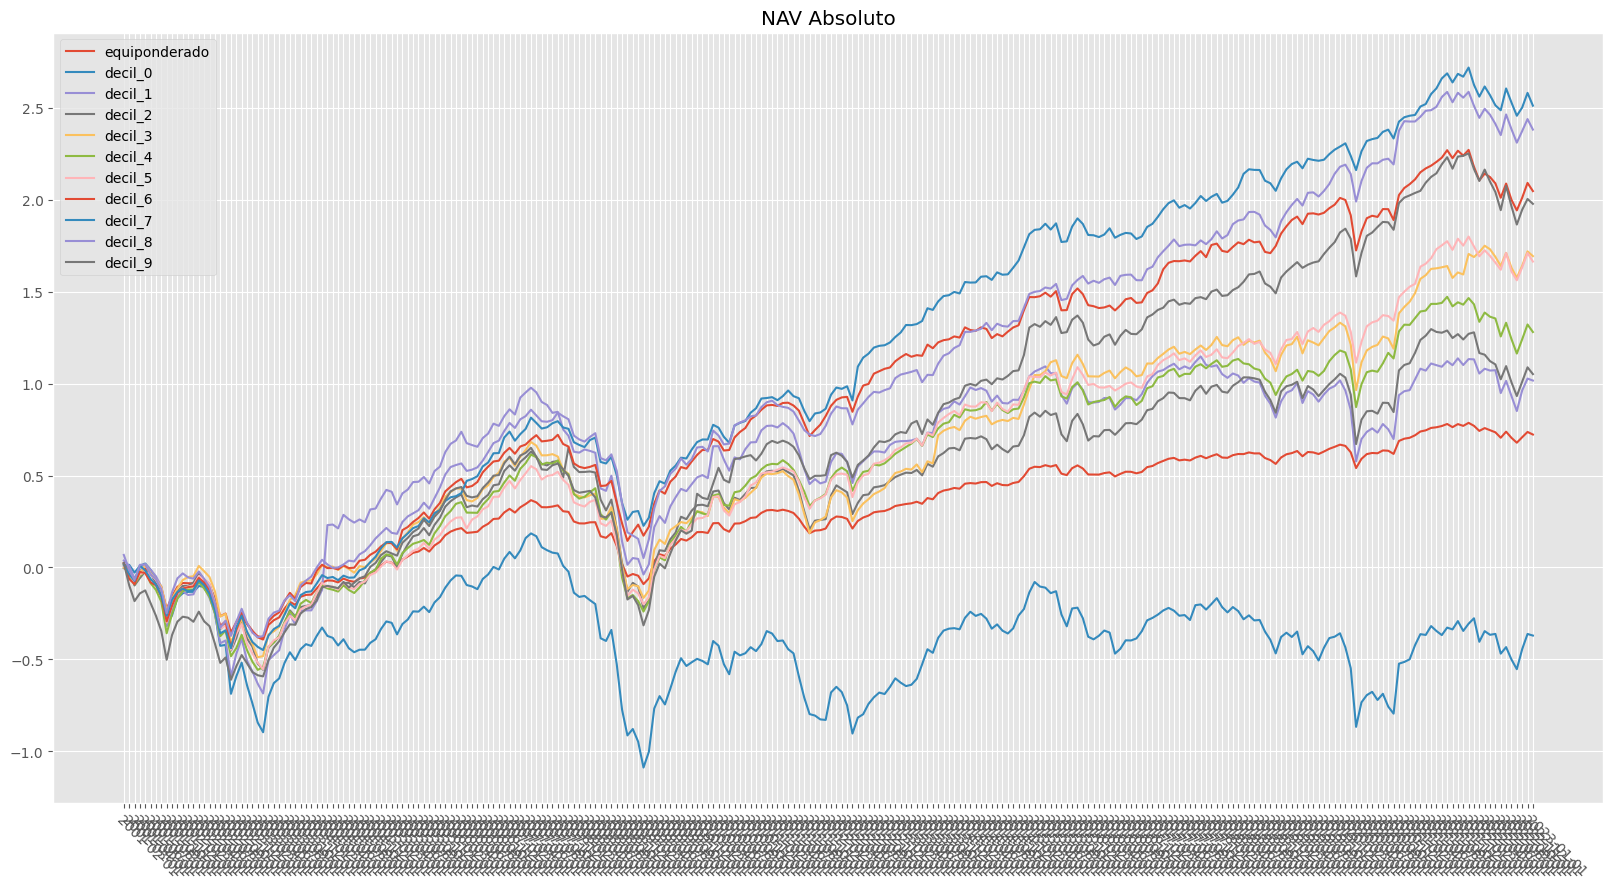

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
for decil in rentabilidades_dict:
    plt.plot(list(rentabilidades_dict['decil_0'].keys()),np.array(list(rentabilidades_dict[decil].values())).cumsum(),label=decil)
plt.xticks(rotation=-45,fontsize=10,ha='left',rotation_mode='anchor')
plt.legend()
plt.title('NAV Absoluto')

Text(0.5, 1.0, 'NAV relativo a Equiponderado')

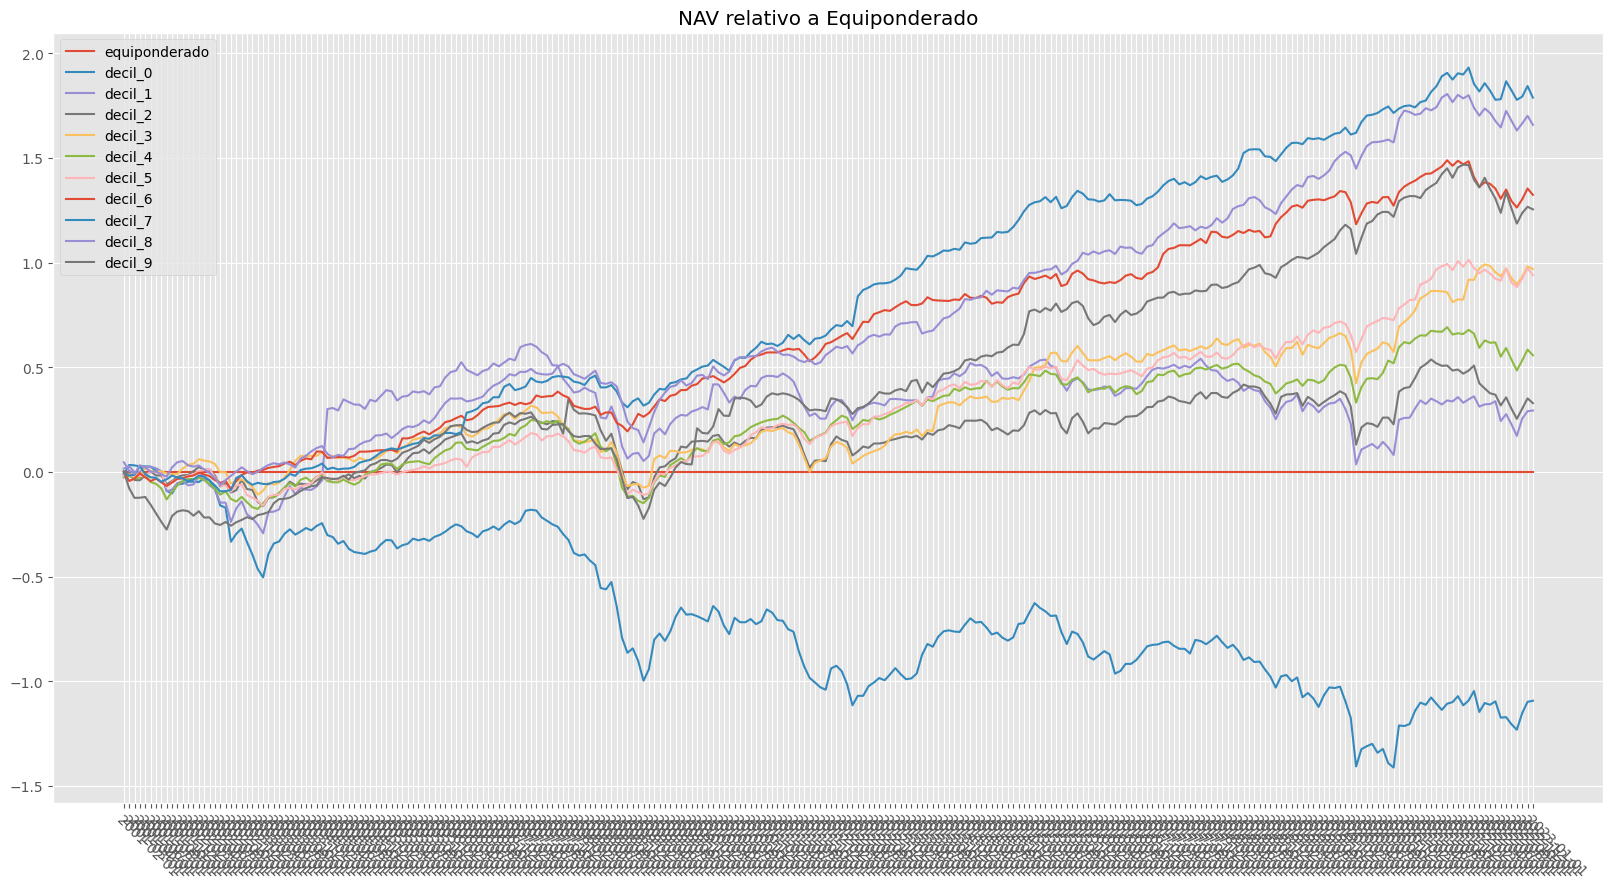

In [34]:
equiponderado = np.array(list(rentabilidades_dict['equiponderado'].values()))
plt.figure(figsize=(20,10))
for decil in rentabilidades_dict:
    plt.plot(list(rentabilidades_dict['decil_0'].keys()),(np.array(list(rentabilidades_dict[decil].values()))-equiponderado).cumsum(),label=decil)
plt.xticks(rotation=-45,fontsize=10,ha='left',rotation_mode='anchor')
plt.legend()
plt.title('NAV relativo a Equiponderado')

Text(0.5, 1.0, 'Rentabilidad media anualizada')

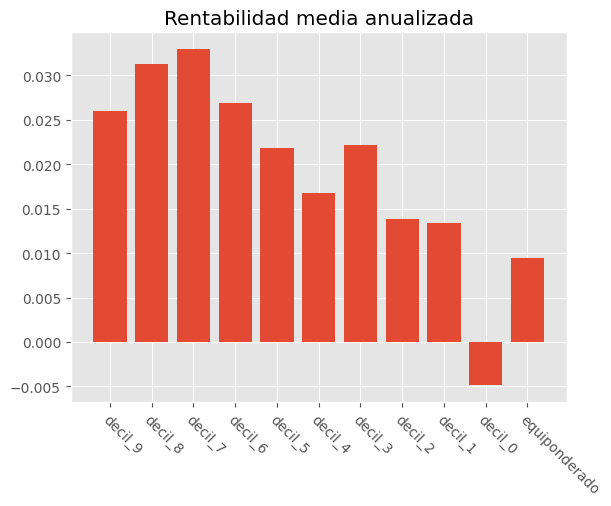

In [35]:
keys = list(rentabilidades_dict.keys())
rentabilidades_medias = [np.mean(list(rentabilidades_dict[decil].values()))*np.sqrt(12) for decil in rentabilidades_dict]

plt.bar(keys[::-1],rentabilidades_medias[::-1])
plt.xticks(rotation=-45,ha='left',rotation_mode='anchor')
plt.title('Rentabilidad media anualizada')

Text(0.5, 1.0, 'Volatilidad Anualizada')

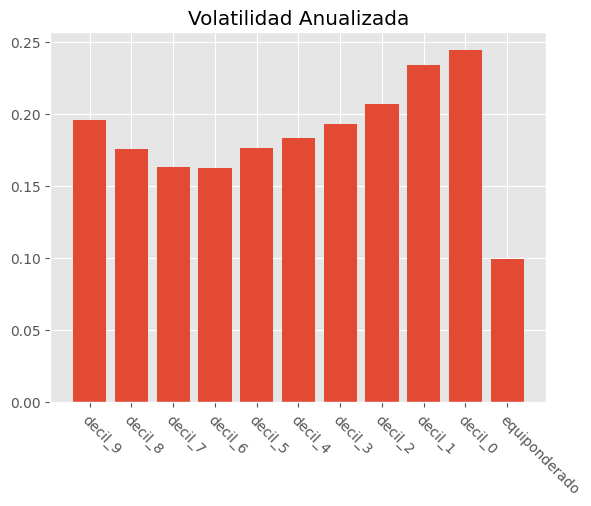

In [36]:
volatilidades_anualizadas = [np.std(list(rentabilidades_dict[decil].values()))*np.sqrt(12) for decil in rentabilidades_dict]

plt.bar(keys[::-1],volatilidades_anualizadas[::-1])
plt.xticks(rotation=-45,ha='left',rotation_mode='anchor')
plt.title('Volatilidad Anualizada')

Text(0.5, 1.0, 'Ratio Sharpe')

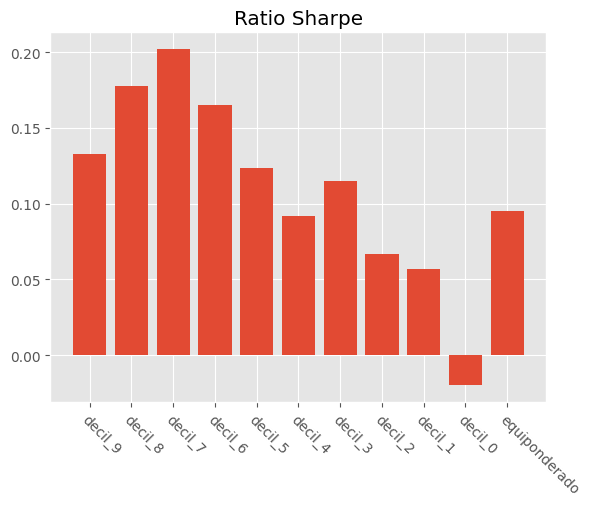

In [37]:
sharpe = np.array(rentabilidades_medias)/np.array(volatilidades_anualizadas)

plt.bar(keys[::-1],sharpe[::-1])
plt.xticks(rotation=-45,ha='left',rotation_mode='anchor')
plt.title('Ratio Sharpe')